# Example Jupyter-Notebook for mrbles analysis package

#### *Author: Björn Harink*  
*Last update: 20180710*  
*Set: PyPI shipped example data*  
*Description:* Short pipeline example for mrbles analysis package using shipped sample data.

*General note: use Shift+TAB while cursos is inside () to show Docstrings (Python documentation standards). All Classes and Methods have docstrings (NumPy style).*

Load mrbles package. This should depict:

`Copyright 2015-2018 - The Encoded Beads Project - ThornLab@UCSF and FordyceLab@Stanford  - Version:  x.x.x`

In [1]:
import sys
sys.path.insert(0, r'G:\My Drive\[Stanford]\DEV\Encoded Beads Project\Bead Analysis')

In [2]:
import mrbles

Copyright 2015-2018 - The Encoded Beads Project - ThornLab@UCSF and FordyceLab@Stanford  - Version:  0.11.8


Additional required imports

In [3]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
# For fancy interactive Plotly graphs
from plotly import tools
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

Download example files from: https://github.com/FordyceLab/MRBLEs/tree/master/data

Set package_path where you unpacked all the files.

In [4]:
package_path = '../data/'

## Load MRBLE library information

Load excel file with information about the the MRBLES library. Please use example file.

Main information that needs to in there are the different ratios (e.g. Dy, Sm, Tm). The code number starts from 0 and is based on the row number. Additional code numbers can be given (for instance when using a partial code set), but this not influence the code calling. All additional columns  provided in the classes are added as information, with a `info.` as prefix.

In [5]:
mrbles_library_info = pd.read_excel(package_path + 'mrbles-library-info-example.xlsx')

In [6]:
mrbles_library_info

code          sequence  repeat      set           info       Dy       Sm  \
0      1   AGIVPIHVTHAPGEE     NaN    match       Scramble  0.00000  0.00000   
1      2      HPVIVITGPHEE     NaN    match      PVIVIT-WT  0.00000  0.00000   
2      3      HPRIVITGPHEE     NaN    match    PVIVIT-Core  0.00000  0.00000   
3      4      HPLIVITGPHEE     NaN    match    PVIVIT-Core  0.00000  0.00000   
4      5      HPVIVIEGPHEE     NaN    match    PVIVIT-Core  0.00000  0.10822   
5      6      HPVIVLTGPHEE     NaN    match    PVIVIT-Core  0.00000  0.10822   
6      7      IPVIVITGPHEE     NaN    match   PVIVIT-Flank  0.00000  0.10822   
7      8      HPVIVITGLHEE     NaN    match   PVIVIT-Flank  0.00000  0.10822   
8      9      HPVIVITMPHEE     NaN    match   PVIVIT-Flank  0.00000  0.25050   
9     10      HPKIVITGPHEE     NaN    match    PKIVIT-Core  0.00000  0.25050   
10    11      HPKIIITGPHEE     NaN    match    PKIVIT-Core  0.00000  0.25050   
11    12      HPKIVLTGPHEE     NaN    match    PKIVIT-Core  0.00000  0.43758   
12    13      HPKIVIQGPHEE     NaN    match    PKIVIT-Core  0.00000  0.43758   
13    14      IPKIVITGPHEE     NaN    match   PKIVIT-Flank  0.00000  0.43758   
14    15      TPKIVITGPHEE     NaN    match   PKIVIT-Flank  0.00000  0.68356   
15    16      HPKIVITTPHEE     NaN    match   PKIVIT-Flank  0.00000  0.68356   
16    17      HPKIVITNPHEE     NaN    match   PKIVIT-Flank  0.00000  0.68356   
17    18      IPKIIITYPGEE     NaN  jackpot            NaN  0.08155  0.00000   
18    19      VPKIIITYPGEE     NaN  jackpot            NaN  0.08155  0.00000   
19    20      IPKIIVTYPGEE     NaN  jackpot            NaN  0.08155  0.00000   
20    21      IPKIIVTYPDEE     NaN  jackpot            NaN  0.08155  0.10822   
21    22      HPVIVITGPZEE     NaN    match   PVIVIT-Flank  0.08155  0.10822   
22    23      IPRIIITKPZEE     NaN  jackpot            NaN  0.08155  0.10822   
23    24      IPKIIVTAPZEE     NaN  jackpot            NaN  0.08155  0.25050   
24    25      VPRIIITKPZEE     NaN  jackpot            NaN  0.08155  0.25050   
25    26      VPRIVITAPZEE     NaN  jackpot            NaN  0.08155  0.25050   
26    27      IPKIIITYPZEE     NaN  jackpot            NaN  0.08155  0.43758   
27    28  KRMEPIAIIITDTEIS     NaN    match      AKAP79-WT  0.08155  0.43758   
28    29  KRMEPIPIIITDTEIS     NaN    match    AKAP79-Core  0.08155  0.68356   
29    30  KRMEPPAIIITDTEIS     NaN    match    AKAP79-Core  0.08155  0.68356   
30    31  KRMEPIAIYITDTEIS     NaN    match    AKAP79-Core  0.20061  0.00000   
31    32  KRMEPIAIIITRTEIS     NaN    match   AKAP79-Flank  0.20061  0.00000   
32    33  KRMEPIAIIITKTEIS     NaN    match   AKAP79-Flank  0.20061  0.10822   
33    34  KRMEPIAIIITDTTIS     NaN    match   AKAP79-Flank  0.20061  0.10822   
34    35  KRMEPIAIIITDYEIS     NaN    match   AKAP79-Flank  0.20061  0.25050   
35    36  KRMEPPKIIITDTEIS     NaN  jackpot            NaN  0.20061  0.25050   
36    37  KRMEPPKIIITDTSIS     NaN  jackpot            NaN  0.20061  0.43758   
37    38  ASGLLPRIIITPPYEL     NaN  jackpot            NaN  0.20061  0.43758   
38    39  ASGLSPRIEITPSHEL     NaN    match      NFATc2-WT  0.20061  0.68356   
39    40  ASGLSPRILITPSHEL     NaN    match  NFATc2-Mutant  0.37445  0.00000   
40    41  ASGLSPRIAITPSHEL     NaN    match  NFATc2-Mutant  0.37445  0.00000   
41    42  ASGLSPRIEISPSHEL     NaN    match  NFATc2-Mutant  0.37445  0.10822   
42    43  ASGLSPRIEIFPSHEL     NaN    match  NFATc2-Mutant  0.37445  0.25050   
43    44  ASGLLPRIEITPSHEL     NaN    match  NFATc2-Mutant  0.37445  0.43758   
44    45  ASGLSPRIEITPFHEL     NaN    match  NFATc2-Mutant  0.62826  0.00000   
45    46  ASGLSPRIEITASHEL     NaN    match  NFATc2-Mutant  0.62826  0.10822   
46    47  ASGLSPRIEITPSSEL     NaN    match  NFATc2-Mutant  0.62826  0.25050   
47    48  ASGLLPRIEITPPPEL     NaN  jackpot            NaN  0.99882  0.00000   

         Tm  
0   0.00000  
1   0.08449  
2   0.28960  
3   0.78752  
4   0.00000  

## Load sample images using: 'mbrles.Images'

Load the folder paths and filenames.

In [7]:
image_folders = {'Set A': package_path,
                 'Set B': package_path
}

image_patterns = {"Set A" : "peptide_biotin_streptavidin_.*.tif",
                  "Set B" : r"peptide_biotin_streptavidin_([0-9]|[0-9][0-9])_MMStack_Pos0.ome.tif"
}

flat_field_image = package_path + "\\20180328-FF-Cy5-E-81im-BIN2.tif"

mrbles_images = mrbles.Images(folders=image_folders, file_patterns=image_patterns)

Found 10 files in Set A
Found 10 files in Set B


Load images in memory.

In [8]:
mrbles_images.load()

By calling the `mrbles_images` object you can see the dataframe.

In [9]:
mrbles_images

{'Set A': <xarray.DataArray (f: 10, c: 11, y: 1024, x: 1024)>
array([[[[121, ..., 132],
         ...,
         [128, ..., 136]],

        ...,

        [[116, ...,  81],
         ...,
         [103, ..., 117]]],


       ...,


       [[[130, ..., 132],
         ...,
         [135, ..., 942]],

        ...,

        [[ 98, ..., 104],
         ...,
         [ 93, ...,  90]]]], dtype=uint16)
Coordinates:
  * c        (c) <U11 'Cy5_5%' 'Brightfield' 'l-435' ... 'l-630' 'l-650' 'l-780'
Dimensions without coordinates: f, y, x, 'Set B': <xarray.DataArray (f: 10, c: 11, y: 1024, x: 1024)>
array([[[[121, ..., 132],
         ...,
         [128, ..., 136]],

        ...,

        [[116, ...,  81],
         ...,
         [103, ..., 117]]],


       ...,


       [[[130, ..., 132],
         ...,
         [135, ..., 942]],

        ...,

        [[ 98, ..., 104],
         ...,
         [ 93, ...,  90]]]], dtype=uint16)
Coordinates:
  * c        (c) <U11 'Cy5_5%' 'Brightfield' 'l-435' ... 'l-630' 'l

Rename channels, if desired.

In [10]:
mrbles_images.rename_channel('Cy5_5%', 'Cy5')

Check channel names by selecting one of the image sets and add `.c`

In [11]:
mrbles_images['Set A'].c

<xarray.DataArray 'c' (c: 11)>
array(['Cy5', 'Brightfield', 'l-435', 'l-474', 'l-536', 'l-546', 'l-572',
       'l-620', 'l-630', 'l-650', 'l-780'], dtype='<U11')
Coordinates:
  * c        (c) <U11 'Cy5' 'Brightfield' 'l-435' ... 'l-630' 'l-650' 'l-780'

You can access an individual images like this:

Apply flat-field correction, if desired.

In [12]:
mrbles_images.flat_field(flat_field_image, 'Cy5')

In [13]:
mrbles_images['Set A', 3, 'Cy5']

<xarray.DataArray (y: 1024, x: 1024)>
array([[113., 145., 115., ..., 135., 135., 124.],
       [125., 134., 143., ..., 147., 180., 128.],
       [112., 124., 134., ..., 145., 182., 139.],
       ...,
       [123., 134., 117., ..., 153., 136., 148.],
       [125., 136., 136., ..., 167., 167., 135.],
       [128., 127., 117., ..., 165., 153., 138.]])
Coordinates:
    c        <U3 'Cy5'
Dimensions without coordinates: y, x

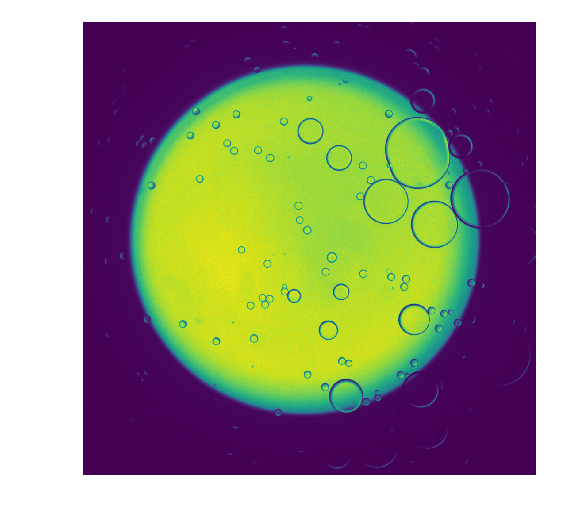

In [14]:
fig = plt.figure(dpi=150)
plt.axis('off')
plt.imshow(mrbles_images['Set A', 1, 'Brightfield']);

Crop images to select an ROI, and/or to save memory in subsequent steps. ROI can changed multiple, since full images stay loaded inside object.

In [15]:
mrbles_images.crop_x = slice(80, 900)
mrbles_images.crop_y = slice(80, 900)

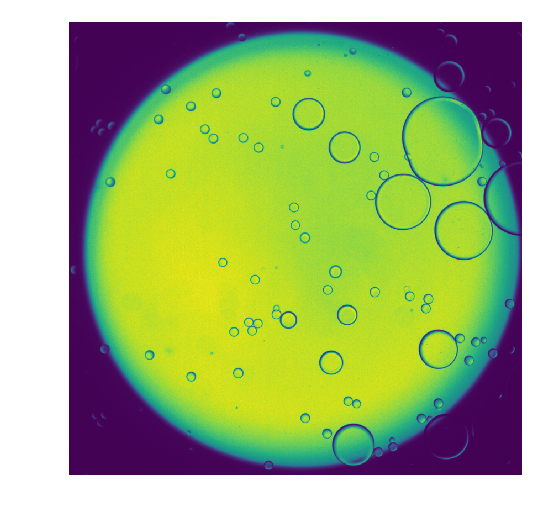

In [16]:
fig = plt.figure(dpi=150)
plt.axis('off')
plt.imshow(mrbles_images['Set A', 1, 'Brightfield']);

Check flat-field correction before and after.

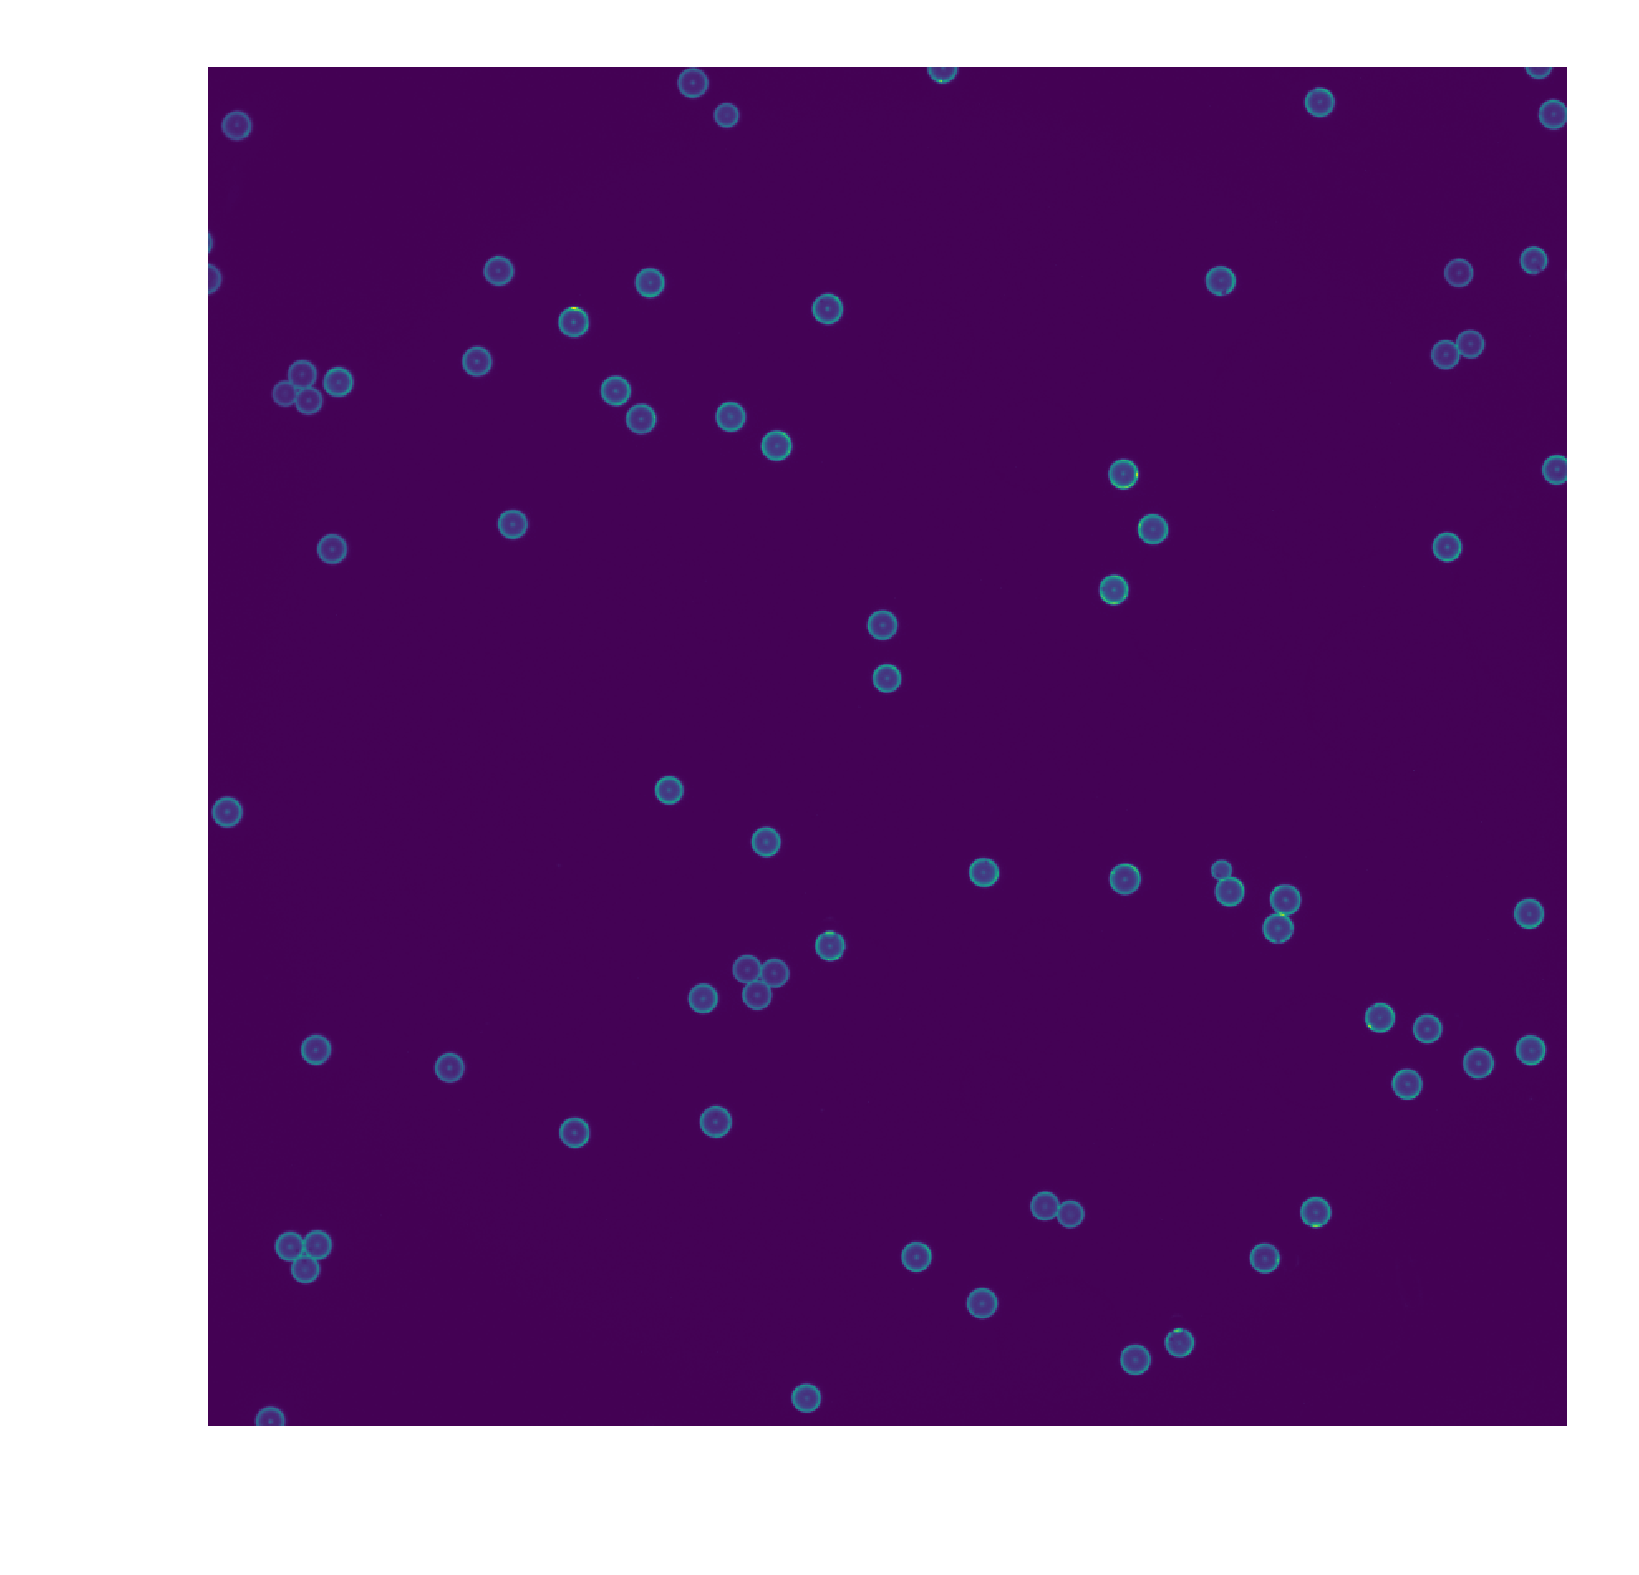

In [17]:
fig = plt.figure(dpi=450)
plt.axis('off')
plt.imshow(mrbles_images['Set A', 1, 'Cy5']);

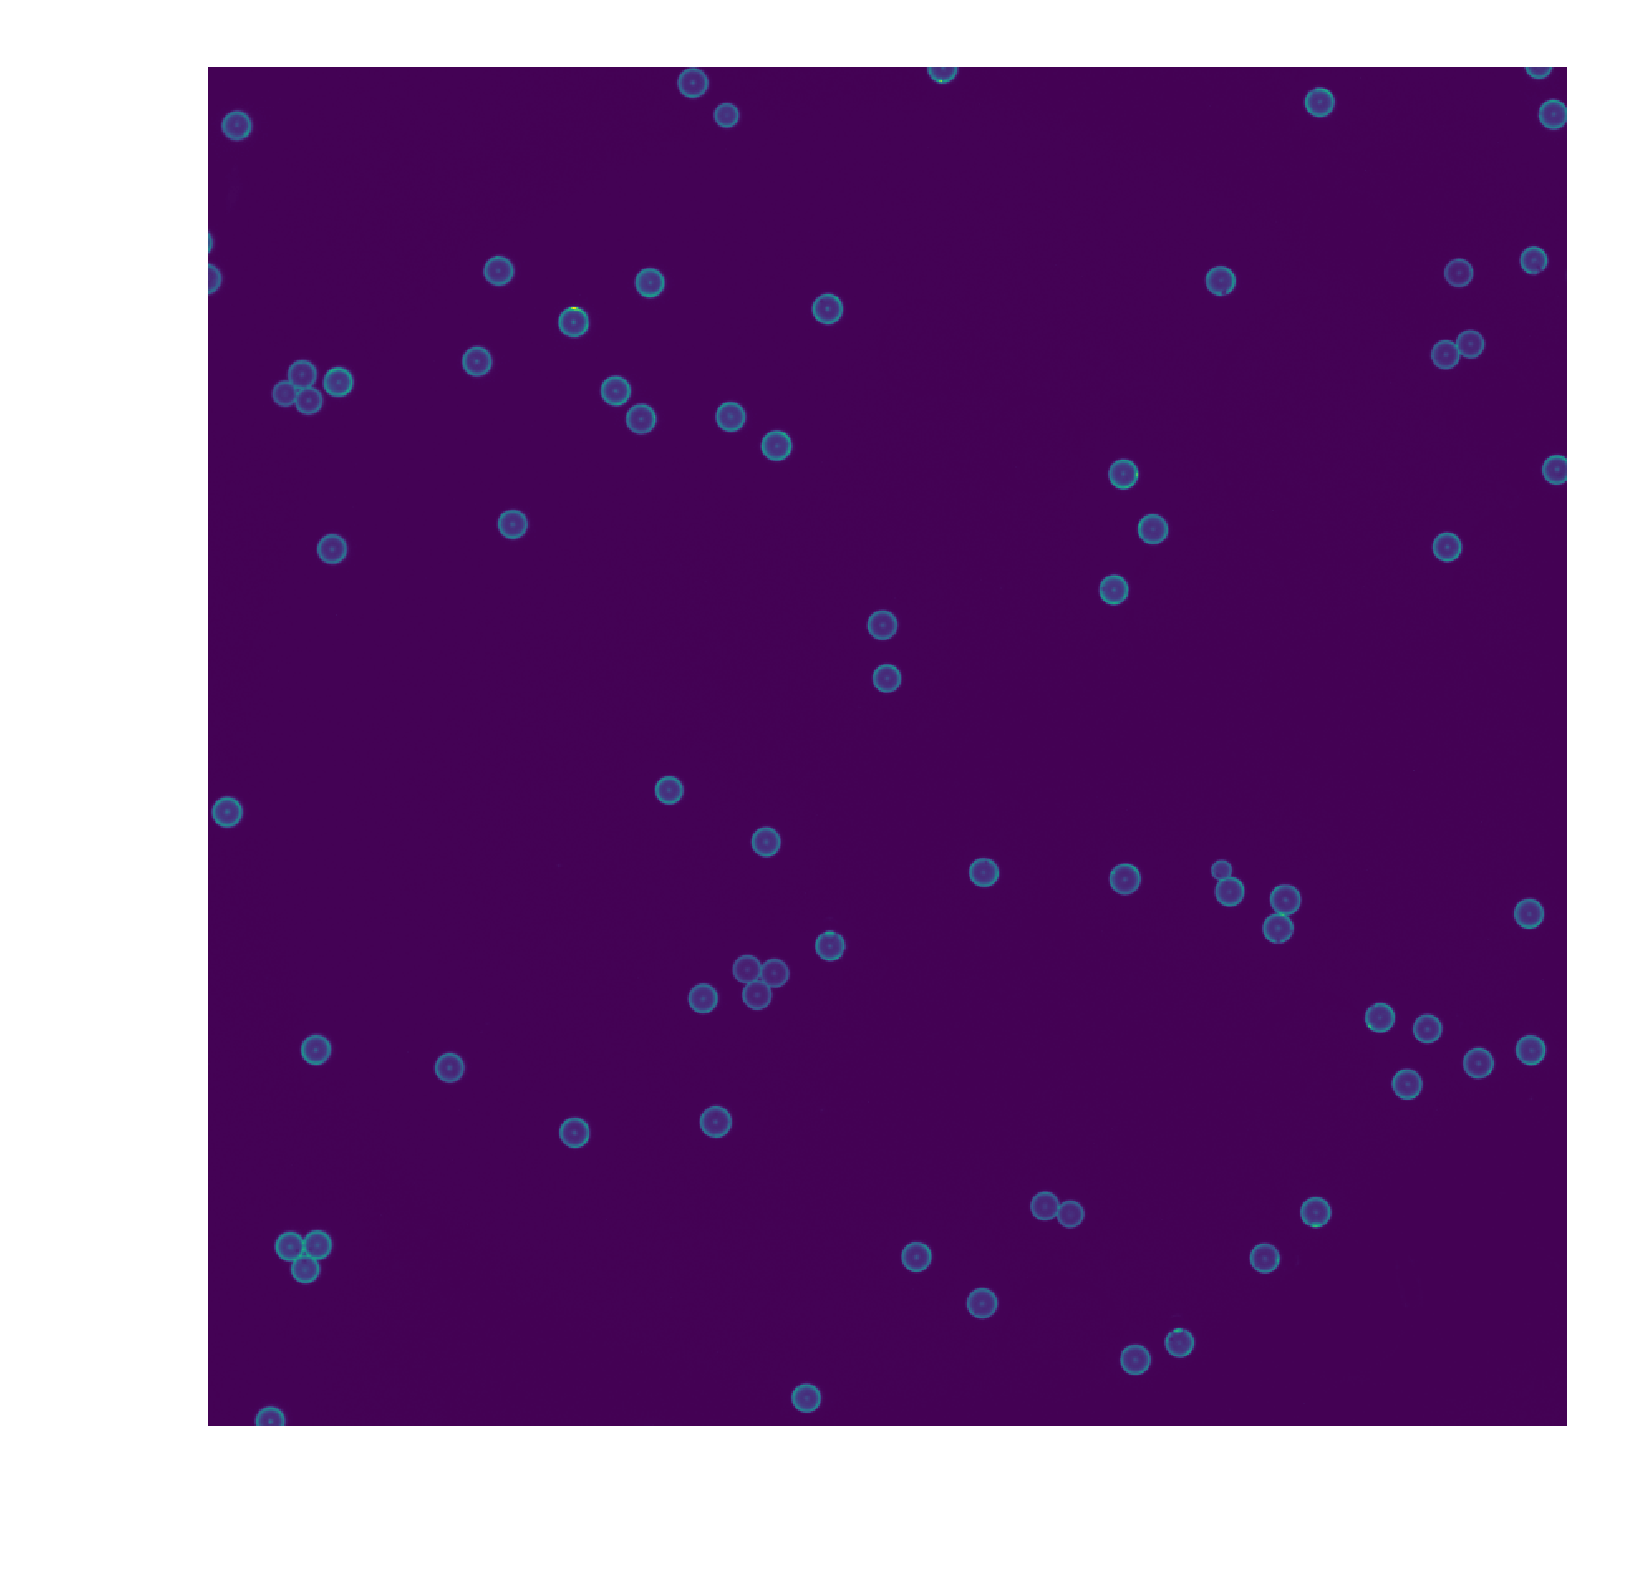

In [18]:
fig = plt.figure(dpi=450)
plt.axis('off')
plt.imshow(mrbles_images['Set A', 1, 'Cy5_FF']);

### Alternative image loading method
The alternative method (if not using OME-Tiff micro-manager image stacks) to load images is using Pyhton dictionaries with numpy arrays. As a demonstrator we convert the previously loaded images as numpy arrays.

In [19]:
set_A_np = mrbles_images['Set A'].values
set_B_np = mrbles_images['Set B'].values

In [20]:
set_A_np

array([[[[ 198.        ,  160.        ,  198.        , ...,
           210.        ,  184.        ,  170.        ],
         [ 181.        ,  203.        ,  161.        , ...,
           202.        ,  223.        ,  197.        ],
         [ 183.        ,  167.        ,  186.        , ...,
           195.        ,  200.        ,  223.        ],
         ...,
         [ 185.        ,  161.        ,  131.        , ...,
           225.        ,  219.        ,  197.        ],
         [ 184.        ,  204.        ,  182.        , ...,
           167.        ,  212.        ,  178.        ],
         [ 175.        ,  139.        ,  202.        , ...,
           191.        ,  192.        ,  207.        ]],

        [[ 130.        ,  125.        ,  135.        , ...,
           138.        ,  148.        ,  138.        ],
         [ 138.        ,  150.        ,  136.        , ...,
           134.        ,  132.        ,  133.        ],
         [ 154.        ,  163.        ,  103.        , .

The order of the numpy array must be file (f), channel (c), Y-axis (y), X-axis (x): `[f, c, y, x]`.

In [21]:
set_A_np.shape

(10, 12, 820, 820)

Insert numpy arrays into Pyhton dictionary.

In [22]:
image_data = {"Set A" : set_A_np,
              "Set B" : set_B_np
}

Create a list of channel names (must be same size as channel dimension size)

In [23]:
channels = ['Cy5', 'Cy5_FF', 'Brightfield', 'l-435', 'l-474', 'l-536', 'l-546', 'l-572', 'l-620', 'l-630', 'l-650', 'l-780']

Load images into mrbles.Images class.

In [24]:
mrbles_images_np = mrbles.Images(data=image_data, channels=channels)

In [25]:
mrbles_images_np

{'Set A': <xarray.DataArray (f: 10, c: 12, y: 820, x: 820)>
array([[[[198., ..., 170.],
         ...,
         [175., ..., 207.]],

        ...,

        [[ 78., ..., 100.],
         ...,
         [103., ..., 101.]]],


       ...,


       [[[157., ..., 174.],
         ...,
         [171., ..., 185.]],

        ...,

        [[ 99., ..., 100.],
         ...,
         [115., ..., 103.]]]])
Coordinates:
  * c        (c) <U11 'Cy5' 'Cy5_FF' 'Brightfield' ... 'l-630' 'l-650' 'l-780'
Dimensions without coordinates: f, y, x, 'Set B': <xarray.DataArray (f: 10, c: 12, y: 820, x: 820)>
array([[[[198., ..., 170.],
         ...,
         [175., ..., 207.]],

        ...,

        [[ 78., ..., 100.],
         ...,
         [103., ..., 101.]]],


       ...,


       [[[157., ..., 174.],
         ...,
         [171., ..., 185.]],

        ...,

        [[ 99., ..., 100.],
         ...,
         [115., ..., 103.]]]])
Coordinates:
  * c        (c) <U11 'Cy5' 'Cy5_FF' 'Brightfield' ... 'l-630' 'l-650

In [26]:
mrbles_images_np['Set A'].c

<xarray.DataArray 'c' (c: 12)>
array(['Cy5', 'Cy5_FF', 'Brightfield', 'l-435', 'l-474', 'l-536', 'l-546',
       'l-572', 'l-620', 'l-630', 'l-650', 'l-780'], dtype='<U11')
Coordinates:
  * c        (c) <U11 'Cy5' 'Cy5_FF' 'Brightfield' ... 'l-630' 'l-650' 'l-780'

## Find MRBLEs in brigh-field images usin `mrbles.Find`

Only use `find_mrbles.settings.parallelize = True` on workstations with multiple CPU cores (>4), otherwise there is no performance gain. It also uses way more memory since it has spawn multiple Python instances.

In [27]:
find_mrbles = mrbles.Find(bead_size=18, pixel_size = 3.5, border_clear=True, circle_size=350)
find_mrbles.settings.parallelize = True

`find_mrbles.settings` is for internal settings. They all have a default setting, which should work in most cases. If necessary this can be tuned, however. Use `find_mrbles.settings` and then TAB to see a list of options.

Adaptive threshold imaging settings:  
`find_mrbles.settings.thr_block`: The scanning block size.  
`find_mrbles.settings.thr_c`: The leniency.  
Please see link for infomation: https://docs.opencv.org/3.4.0/d7/d4d/tutorial_py_thresholding.html  
Use `find_mrbles.settings.img2bin()` for parameter testing. 

Filtering settings (default values are based on parameter `bead_size`, and therefore in pixels):  
`find_mrbles.settings.area_min`: Minimum area. Default: area x 0.5.  
`find_mrbles.settings.area_max`: Maximum area. Default: area x 1.5.  
`find_mrbles.settings.eccen_max`: Maximum eccentricity (0 being most circle, 1 being least circle). Default: 0.65.

These attributes can be read by calling:  
`find_mrbles.settings.area_min` 

In [28]:
find_mrbles.settings.area_min

63.61725123519331

These attributes can be read by calling:  
`find_mrbles.settings.area_min = 60` 

In [29]:
find_mrbles.find(mrbles_images[:, : , 'Brightfield'])

Bead diameter AVG (converted): 62.24
Bead diameter SD (converted): 2.45
Bead diameter CV (converted): 3.94%
Number of beads in set Set A: 821
Number of beads in set Set B: 821
Total number of beads: 1642


Show the final beads found and their dimenions: 

In [30]:
find_mrbles.bead_dims

set  f  bead_no  label  x_centroid  y_centroid    radius   area  \
0     Set A  0        0    4.0  556.463710  118.701613  8.884866  248.0   
1     Set A  0        1    5.0  562.425641  178.887179  7.878479  195.0   
2     Set A  0        2    6.0  548.766667  183.233333  8.175884  210.0   
3     Set A  0        3    7.0  304.774194  188.040323  8.884866  248.0   
4     Set A  0        4    8.0  563.179724  192.746544  8.311032  217.0   
5     Set A  0        5    9.0  592.967213  200.918033  8.812923  244.0   
6     Set A  0        6   11.0  688.471545  213.711382  8.848968  246.0   
7     Set A  0        7   14.0  611.947154  234.504065  8.848968  246.0   
8     Set A  0        8   16.0  685.500000  245.568000  8.920621  250.0   
9     Set A  0        9   21.0  619.672131  272.221311  8.812923  244.0   
10    Set A  0       10   22.0  523.170213  287.000000  8.648863  235.0   
11    Set A  0       11   24.0  235.580460  323.770115  7.442172  174.0   
12    Set A  0       12   25.0  215.859259  329.092593  9.270581  270.0   
13    Set A  0       13   26.0  684.277154  336.531835  9.218934  267.0   
14    Set A  0       14   29.0  692.941176  365.386555  8.703893  238.0   
15    Set A  0       15   32.0  294.436508  406.718254  8.956232  252.0   
16    Set A  0       16   33.0  603.953737  426.288256  9.457541  281.0   
17    Set A  0       17   34.0  568.313559  429.792373  8.667245  236.0   
18    Set A  0       18   36.0  513.063910  486.522556  9.201654  266.0   
19    Set A  0       19   38.0  388.507407  496.937037  9.270581  270.0   
20    Set A  0       20   40.0  624.510040  502.465863  8.902761  249.0   
21    Set A  0       21   41.0  364.604478  506.488806  9.236182  268.0   
22    Set A  0       22   49.0  640.226923  618.434615  9.097284  260.0   
23    Set A  0       23   51.0  545.919118  623.783088  9.304853  272.0   
24    Set A  0       24   56.0  634.698675  664.870861  9.804570  302.0   
25    Set A  0       25   60.0  480.917492  702.673267  9.820789  303.0   
26    Set A  0       26   61.0  330.500000  734.500000  8.214724  212.0   
27    Set A  1        0    4.0  266.285714  128.396825  8.956232  252.0   
28    Set A  1        1    5.0  373.591603  144.290076  9.132206  262.0   
29    Set A  1        2    7.0  220.188976  152.236220  8.991702  254.0   
...     ... ..      ...    ...         ...         ...       ...    ...   
1612  Set B  9       71   76.0  150.767790  587.516854  9.218934  267.0   
1613  Set B  9       72   78.0  381.934694  589.065306  8.830964  245.0   
1614  Set B  9       73   79.0  202.245833  605.491667  8.740387  240.0   
1615  Set B  9       74   80.0  229.194915  605.805085  8.667245  236.0   
1616  Set B  9       75   81.0  492.579926  607.464684  9.253397  269.0   
1617  Set B  9       76   82.0  262.886555  609.533613  8.703893  238.0   
1618  Set B  9       77   83.0  285.809717  613.967611  8.866935  247.0   
1619  Set B  9       78   84.0  213.330612  620.636735  8.830964  245.0   
1620  Set B  9       79   85.0  526.756098  621.500000  8.848968  246.0   
1621  Set B  9       80   86.0  612.128631  623.414938  8.758578  241.0   
1622  Set B  9       81   87.0  165.402174  624.894928  9.373021  276.0   
1623  Set B  9       82   88.0  265.633803  630.474178  8.234076  213.0   
1624  Set B  9       83   89.0  378.738956  636.967871  8.902761  249.0   
1625  Set B  9       84   90.0  301.448000  645.048000  8.920621  250.0   
1626  Set B  9       85   91.0  555.255906  644.771654  8.991702  254.0   
1627  Set B  9       86   92.0  638.970480  644.579336  9.287733  271.0   
1628  Set B  9       87   93.0  357.029412  645.920168  8.703893  238.0   
1629  Set B  9       88   94.0  474.737255  649.737255  9.009385  255.0   
1630  Set B  9       89   95.0  372.624490  652.779592  8.830964  245.0   
1631  Set B  9       90   96.0  444.795082  656.913934  8.812923  244.0   
1632  Set B  9       91   97.0  600.160870  655.813043  8.556359  230.0   
1633  Set B  9       92   99.0  3

Example dimensions plot.

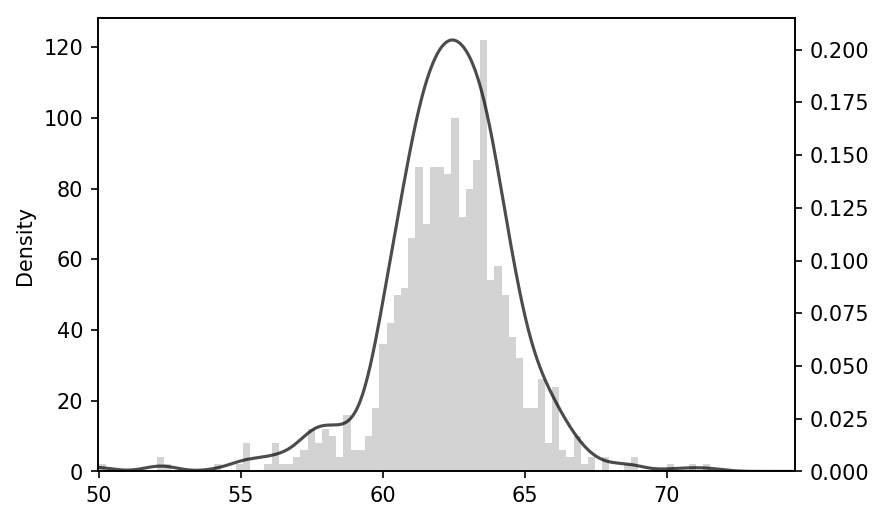

In [31]:
find_mrbles.plot_size_dist()

Plot displaying bright-field image depicting found MRBLEs (crosses).

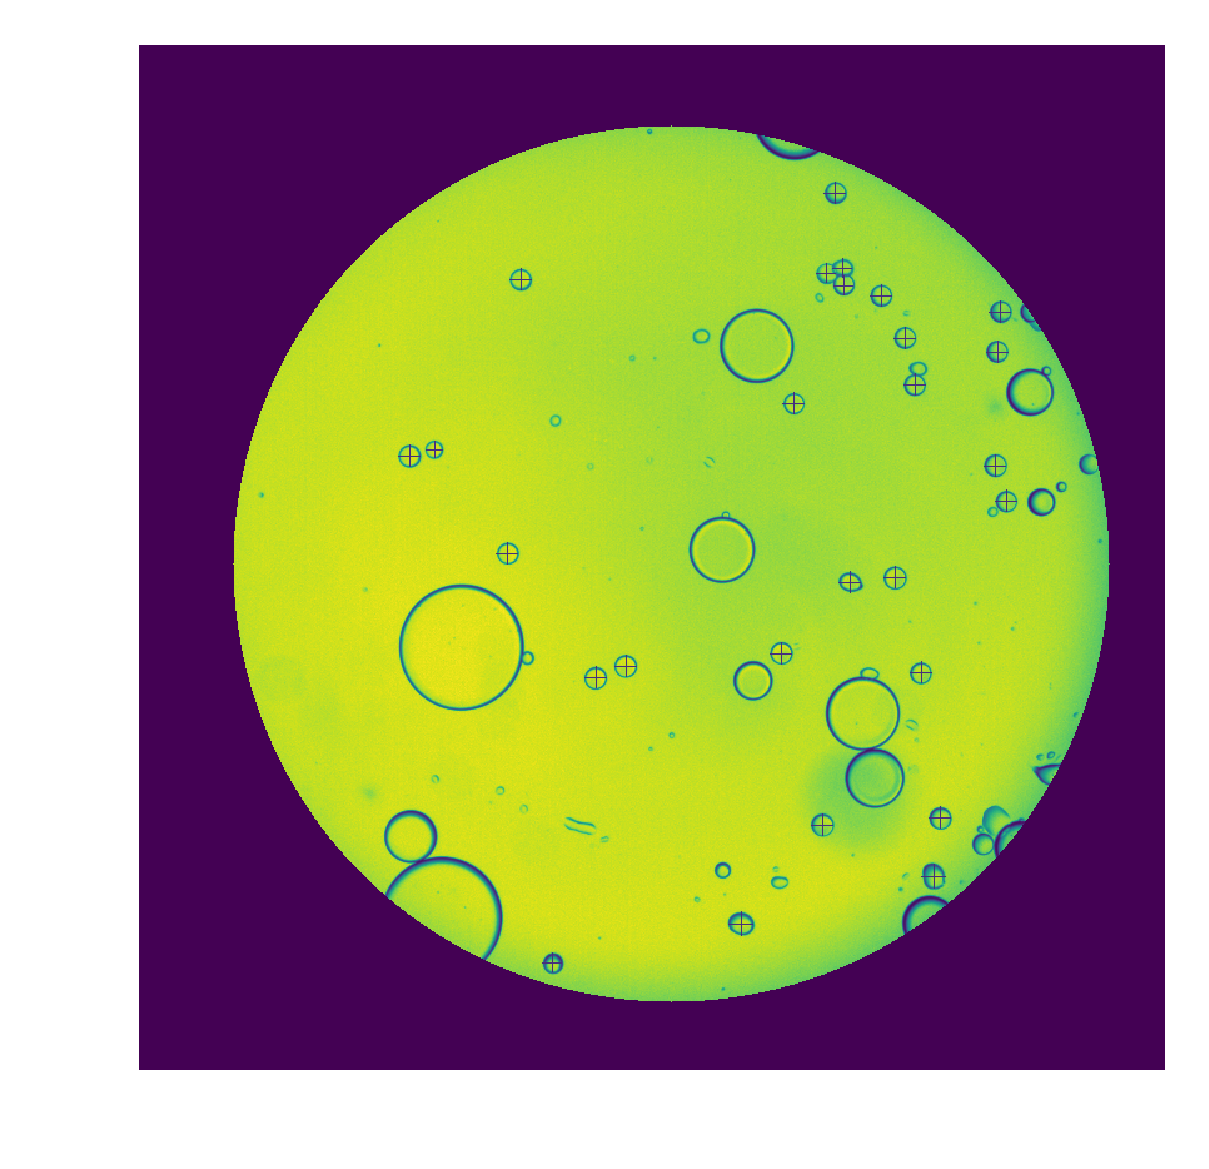

In [32]:
fig = plt.figure(dpi=300)
plt.axis('off')
plt.tight_layout()
plt.imshow(find_mrbles['Set A', 0, 'mask_check']);

## Create reference spectra using: `mblres.References`

Load all references and add background `bkg` image from the data-set to be invastigated. Choose region where there are no beads

In [33]:
# Channel settings
DECODE_CHANNELS = slice('l-435','l-780')  # Channel range for decoding
OBJECT_CHANNEL = 'Brightfield'  # Channel for bead finding

# Reference files
REF_FOLDER = {
    "Dy": package_path,
    "Sm": package_path,
    "Tm": package_path,
    "Eu": package_path,
    "bkg": package_path
}

REF_FILES = {"Dy" : "Dy_Solos_3_MMStack_Pos0.ome.tif",
             "Sm" : "Sm_solos_5_MMStack_Pos0.ome.tif",
             "Tm" : "Tm_solos_3_MMStack_Pos0.ome.tif",
             "Eu" : "Eu_solos_6_MMStack_Pos0.ome.tif",
             "bkg" : "peptide_biotin_streptavidin_01_MMStack_Pos0.ome.tif"  # Always change this!
}

In [34]:
spec_object = mrbles.References(REF_FOLDER, REF_FILES, OBJECT_CHANNEL, DECODE_CHANNELS, bead_size=18)
spec_object.crop_x = slice(262, 762)
spec_object.crop_y = slice(262, 762)
spec_object.bkg_roi = [slice(388, 542), slice(440, 620)]

Found 1 files in Dy
Found 1 files in Sm
Found 1 files in Tm
Found 1 files in Eu
Found 1 files in bkg


Load files and generate reference spectra.

In [35]:
spec_object.load()

Bead diameter AVG: 15.65
Bead diameter SD: 1.68
Bead diameter CV: 10.76%
Number of beads in set Dy: 270
Number of beads in set Eu: 203
Number of beads in set Sm: 506
Number of beads in set Tm: 308
Total number of beads: 1287


Display and plot data.

In [36]:
spec_object.data

Dy        Sm        Tm        Eu       bkg
channels                                                  
l-435     0.008394  0.016085  0.031182  0.007772  0.161871
l-474     0.399939  0.028211  0.635101  0.013283  0.216341
l-536     0.009672  0.027023  0.041902  0.024366  0.157760
l-546     0.003491  0.007325  0.013256  0.008681  0.078623
l-572     0.531328  0.109775  0.020980  0.008600  0.078623
l-620     0.000839  0.021826  0.002190  0.555858  0.060637
l-630     0.025295  0.298886  0.016081  0.336260  0.064234
l-650     0.006085  0.464341  0.026801  0.038396  0.055498
l-780     0.014956  0.026528  0.212507  0.006783  0.126413

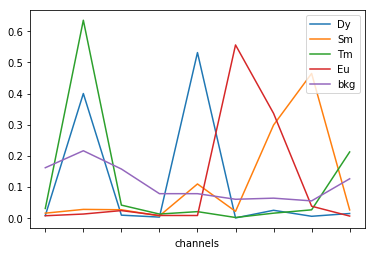

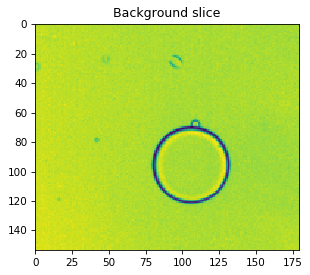

In [37]:
spec_object.plot()

## Generate spectral unmixed images and ratio images using: `mrbles.Ratio`

In [38]:
ratio_images = mrbles.Ratio(spec_object)

In [39]:
ratio_images.get(mrbles_images[:, :, DECODE_CHANNELS], 'Eu',  combine_data=mrbles_images[:, :, ['Cy5_FF']])

See channels generated in `ratio_images` object:

In [40]:
ratio_images['Set A'].c.values.tolist()

['Cy5_FF', 'Dy', 'Dy_ratio', 'Eu', 'Sm', 'Sm_ratio', 'Tm', 'Tm_ratio', 'bkg']

Check inmixed images. Checking `Tm` and `bkg` since they share similar peak at 780 nm. If unmixing is not working properly it should show in the images.

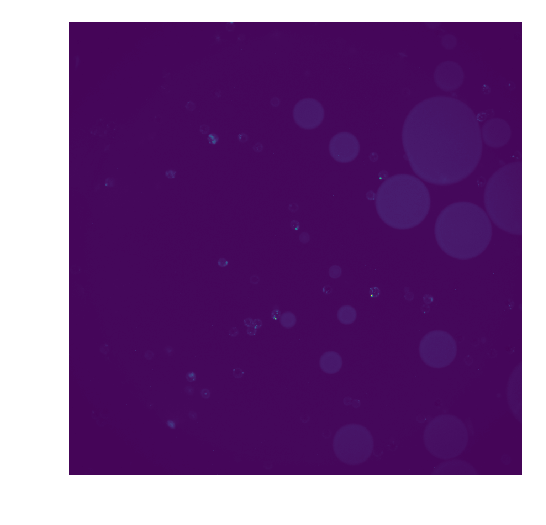

In [41]:
fig = plt.figure(dpi=150)
plt.axis('off')
plt.imshow(ratio_images['Set A', 1, 'bkg']);

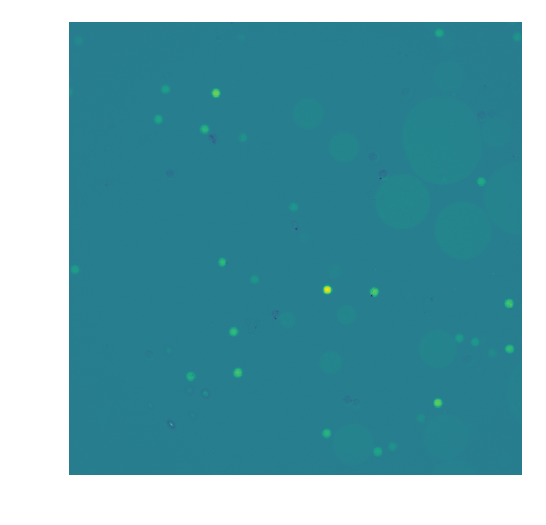

In [42]:
fig = plt.figure(dpi=150)
plt.axis('off')
plt.imshow(ratio_images['Set A', 1, 'Tm']);

## Extract data from each MRBLE using: `mrbles.Extract`

This is the step to use the masks from bead finding and select all channels you want the intensities to be extracted using and select which masks. First, set up the extract class. The default method is using the median (`np.median`) of each bead.

In [43]:
extract_data = mrbles.Extract()

### Alternative functions
One can pass an alternative funtion through parameter `function`

In [55]:
extract_data_alt = mrbles.Extract(function=np.sum)

Or a custom function

In [60]:
def extract_function(data):
    return np.sum(data)/data.size

In [61]:
extract_data_custom = mrbles.Extract(function=extract_function)

Select ratio images (for decoding), `Eu` and `bkg` (for filtering), and assay channels (e.g. Cy5). combine_data with bead dimensions.

In [62]:
extract_data_custom.get(ratio_images[:, :, ['Dy_ratio', 'Sm_ratio', 'Tm_ratio', 'bkg', 'Eu', 'Cy5_FF']], 
                        find_mrbles[:, :, ['mask_ring', 'mask_inside', 'mask_full', 'mask_bkg']],
                        combine_data=find_mrbles.bead_dims)

In [65]:
extract_data_custom.filter()

Pre-filter: 1642
Post-filter: 1564
Filtered: 78 (4.8%)


In [66]:
extract_data_custom.data

index    set  f  bead_no  label  x_centroid  y_centroid    radius  \
0         0  Set A  0        0    4.0  556.463710  118.701613  8.884866   
2         2  Set A  0        2    6.0  548.766667  183.233333  8.175884   
3         3  Set A  0        3    7.0  304.774194  188.040323  8.884866   
4         4  Set A  0        4    8.0  563.179724  192.746544  8.311032   
5         5  Set A  0        5    9.0  592.967213  200.918033  8.812923   
6         6  Set A  0        6   11.0  688.471545  213.711382  8.848968   
7         7  Set A  0        7   14.0  611.947154  234.504065  8.848968   
8         8  Set A  0        8   16.0  685.500000  245.568000  8.920621   
9         9  Set A  0        9   21.0  619.672131  272.221311  8.812923   
10       10  Set A  0       10   22.0  523.170213  287.000000  8.648863   
11       11  Set A  0       11   24.0  235.580460  323.770115  7.442172   
12       12  Set A  0       12   25.0  215.859259  329.092593  9.270581   
13       13  Set A  0       13   26.0  684.277154  336.531835  9.218934   
15       15  Set A  0       15   32.0  294.436508  406.718254  8.956232   
16       16  Set A  0       16   33.0  603.953737  426.288256  9.457541   
18       18  Set A  0       18   36.0  513.063910  486.522556  9.201654   
19       19  Set A  0       19   38.0  388.507407  496.937037  9.270581   
20       20  Set A  0       20   40.0  624.510040  502.465863  8.902761   
21       21  Set A  0       21   41.0  364.604478  506.488806  9.236182   
22       22  Set A  0       22   49.0  640.226923  618.434615  9.097284   
23       23  Set A  0       23   51.0  545.919118  623.783088  9.304853   
27       27  Set A  1        0    4.0  266.285714  128.396825  8.956232   
28       28  Set A  1        1    5.0  373.591603  144.290076  9.132206   
29       29  Set A  1        2    7.0  220.188976  152.236220  8.991702   
30       30  Set A  1        3   11.0  245.509804  193.533333  9.009385   
31       31  Set A  1        4   13.0  315.056000  209.304000  8.920621   
33       33  Set A  1        6   15.0  342.748175  226.861314  9.338999   
34       34  Set A  1        7   17.0  552.016000  243.968000  8.920621   
35       35  Set A  1        8   18.0  183.405622  274.216867  8.902761   
36       36  Set A  1        9   27.0  406.719231  335.230769  9.097284   
...     ...    ... ..      ...    ...         ...         ...       ...   
1611   1611  Set B  9       70   75.0  561.358779  582.332061  9.132206   
1612   1612  Set B  9       71   76.0  150.767790  587.516854  9.218934   
1613   1613  Set B  9       72   78.0  381.934694  589.065306  8.830964   
1614   1614  Set B  9       73   79.0  202.245833  605.491667  8.740387   
1615   1615  Set B  9       74   80.0  229.194915  605.805085  8.667245   
1616   1616  Set B  9       75   81.0  492.579926  607.464684  9.253397   
1617   1617  Set B  9       76   82.0  262.886555  609.533613  8.703893   
1618   1618  Set B  9       77   83.0  285.809717  613.967611  8.866935   
1619   1619  Set B  9       78   84.0  213.330612  620.636735  8.830964   
1620   1620  Set B  9       79   85.0  526.756098  621.500000  8.848968   
1621   1621  Set B  9       80   86.0  612.128631  623.414938  8.758578   
1622   1622  Set B  9       81   87.0  165.402174  624.894928  9.373021   
1623   1623  Set B  9       82   88.0  265.633803  630.474178  8.234076   
1624   1624  Set B  9       83   89.0  378.738956  636.967871  8.902761   
1625   1625  Set B  9       84   90.0  301.448000  645.048000  8.920621   
1626   1626  Set B  9       85   91.0  555.255906  644.771654  8.991702   
1627   1627  Set B  9       86   92.0  638.970480  644.579336  9.287733   
1628   1628  Set B  9       87   93.0  357.029412  645.920168  8.703893   
1629   1629  Set B  9       88   94.0  474.737255  649.737255  9.009385   
1630   1630  Set B  9       89   95.0  372.624490  652.779592  8.830964   
1631   1631  Set B  9       90   96.0  444.795082  656.913934  8.812923   
1632   1632  Set B  9       91 

Subtract background `Cy5_FF.mask_bkg` from flat-field corrected Cy5 signal from the ring `Cy5_FF.mask_ring` and add to data.

In [47]:
extract_data.background_subtract('Cy5_FF.mask_ring', 'Cy5_FF.mask_bkg')

In [48]:
extract_data.data

index    set  f  bead_no  label  x_centroid  y_centroid    radius  \
0         0  Set A  0        0    4.0  556.463710  118.701613  8.884866   
2         2  Set A  0        2    6.0  548.766667  183.233333  8.175884   
3         3  Set A  0        3    7.0  304.774194  188.040323  8.884866   
4         4  Set A  0        4    8.0  563.179724  192.746544  8.311032   
5         5  Set A  0        5    9.0  592.967213  200.918033  8.812923   
6         6  Set A  0        6   11.0  688.471545  213.711382  8.848968   
7         7  Set A  0        7   14.0  611.947154  234.504065  8.848968   
8         8  Set A  0        8   16.0  685.500000  245.568000  8.920621   
9         9  Set A  0        9   21.0  619.672131  272.221311  8.812923   
10       10  Set A  0       10   22.0  523.170213  287.000000  8.648863   
11       11  Set A  0       11   24.0  235.580460  323.770115  7.442172   
12       12  Set A  0       12   25.0  215.859259  329.092593  9.270581   
13       13  Set A  0       13   26.0  684.277154  336.531835  9.218934   
15       15  Set A  0       15   32.0  294.436508  406.718254  8.956232   
16       16  Set A  0       16   33.0  603.953737  426.288256  9.457541   
18       18  Set A  0       18   36.0  513.063910  486.522556  9.201654   
19       19  Set A  0       19   38.0  388.507407  496.937037  9.270581   
20       20  Set A  0       20   40.0  624.510040  502.465863  8.902761   
21       21  Set A  0       21   41.0  364.604478  506.488806  9.236182   
22       22  Set A  0       22   49.0  640.226923  618.434615  9.097284   
27       27  Set A  1        0    4.0  266.285714  128.396825  8.956232   
28       28  Set A  1        1    5.0  373.591603  144.290076  9.132206   
29       29  Set A  1        2    7.0  220.188976  152.236220  8.991702   
30       30  Set A  1        3   11.0  245.509804  193.533333  9.009385   
31       31  Set A  1        4   13.0  315.056000  209.304000  8.920621   
33       33  Set A  1        6   15.0  342.748175  226.861314  9.338999   
34       34  Set A  1        7   17.0  552.016000  243.968000  8.920621   
36       36  Set A  1        9   27.0  406.719231  335.230769  9.097284   
37       37  Set A  1       10   28.0  409.336100  367.244813  8.758578   
39       39  Set A  1       12   30.0  277.920354  434.743363  8.481629   
...     ...    ... ..      ...    ...         ...         ...       ...   
1611   1611  Set B  9       70   75.0  561.358779  582.332061  9.132206   
1612   1612  Set B  9       71   76.0  150.767790  587.516854  9.218934   
1613   1613  Set B  9       72   78.0  381.934694  589.065306  8.830964   
1614   1614  Set B  9       73   79.0  202.245833  605.491667  8.740387   
1615   1615  Set B  9       74   80.0  229.194915  605.805085  8.667245   
1616   1616  Set B  9       75   81.0  492.579926  607.464684  9.253397   
1617   1617  Set B  9       76   82.0  262.886555  609.533613  8.703893   
1618   1618  Set B  9       77   83.0  285.809717  613.967611  8.866935   
1619   1619  Set B  9       78   84.0  213.330612  620.636735  8.830964   
1620   1620  Set B  9       79   85.0  526.756098  621.500000  8.848968   
1621   1621  Set B  9       80   86.0  612.128631  623.414938  8.758578   
1622   1622  Set B  9       81   87.0  165.402174  624.894928  9.373021   
1623   1623  Set B  9       82   88.0  265.633803  630.474178  8.234076   
1624   1624  Set B  9       83   89.0  378.738956  636.967871  8.902761   
1625   1625  Set B  9       84   90.0  301.448000  645.048000  8.920621   
1626   1626  Set B  9       85   91.0  555.255906  644.771654  8.991702   
1627   1627  Set B  9       86   92.0  638.970480  644.579336  9.287733   
1628   1628  Set B  9       87   93.0  357.029412  645.920168  8.703893   
1629   1629  Set B  9       88   94.0  474.737255  649.737255  9.009385   
1630   1630  Set B  9       89   95.0  372.624490  652.779592  8.830964   
1631   1631  Set B  9       90   96.0  444.795082  656.913934  8.812923   
1632   1632  Set B  9       91 

## Decode MRBLEs using: `mrbles.Decode`

Set up the decode part of the pipeline. Give it the targets as first parameter (only the targets!), and optionally the additional MRBLEs library information.

In [49]:
mrbles_decode = mrbles.Decode(mrbles_library_info.loc[:, ['Dy', 'Sm', 'Tm']], seq_list=mrbles_library_info)

In [50]:
mrbles_decode.decode(extract_data.data.loc[:,('Dy_ratio.mask_inside', 'Sm_ratio.mask_inside', 'Tm_ratio.mask_inside')], 
                     combine_data=extract_data.data)

Delta:  0.10395792250181396
Delta:  0.04377631063855397
Delta:  0.044923662044698276
Delta:  0.0012298234362942925
Delta:  0.0
Converged after: 5
Number of unique codes found: 48
Missing codes: None
Silhouette Coefficient: 0.8163750293293263


Print codes and plot ratio data.

In [51]:
mrbles_decode.plot_clusters_3D()

Filtered by confidence.

In [52]:
mrbles_decode.plot_clusters_3D(min_prob=0.95)

In [53]:
mrbles_decode.plot_clusters_2D(['Dy', 'Sm'], ci_trace=0.95)

ValueError: 
    Invalid value of type 'builtins.str' received for the 'mode' property of scatter
        Received value: 'line'

    The 'mode' property is a flaglist and may be specified
    as a string containing:
      - Any combination of ['lines', 'markers', 'text'] joined with '+' characters
        (e.g. 'lines+markers')
        OR exactly one of ['none'] (e.g. 'none')

In [ ]:
mrbles_decode.plot_clusters_2D(['Sm', 'Tm'], ci_trace=0.95)

In [ ]:
mrbles_decode.plot_clusters_2D(['Tm', 'Dy'], ci_trace=0.95)

## Analyze data using `mrbles.Analyze`

Using the gathered data the data can be analyzed to return per-bead and per-code data. Also provided are a per-bead report and an overall quality control report.

In [ ]:
analyze = mrbles.Analyze(mrbles_decode, mrbles_library_info, ratio_images, find_mrbles)

In [ ]:
# analyze.analyze('Cy5_FF.mask_ring', confidence=0.95, bkg_data='Cy5_FF.mask_bkg')  # If background not calculated using mrbles.Extract
analyze.analyze('Cy5_FF.mask_ring_min_bkg', min_prob=0.95)

In [ ]:
analyze.data_per_code

In [ ]:
analyze.data_per_bead

In [ ]:
# analyze.normalize(mrbles_decode.data.loc[(mrbles_decode.data.confidence>=0.95), ('code', 'Cy5_FF.mask_ring')])

In [ ]:
analyze.mrble_report('Cy5_FF', 'bead-report.pdf', set_name='Set A', codes=[0,1,2], files=[0,1,2])

In [ ]:
analyze.qc_report('qc-report.pdf', savefig=False)